# **Mental Health in Tech Industry: A Journey from 2014 to 2019** 

### **Introduction**


In this project, we analyzed the state of  **Mental Health in the tech world** from 2014 to 2019.

Our main objetives were to address the following key questions:

1. has the prevalence of mental health issues changed over time?
2. Which factors - such as job type- are most strongly associated with mental helth challengers?
3. To what extent do companies provide support to employees, and how has the employer-employee dialogue araound mental health evolved?

the ultimate goal of this analysis is to provide meaningful insights that contibuite to building healthier and more supportive work environments in the tech sector.






### Data and cleaning

**Source.**: [Mental Health in the Tech Industry](https://www.kaggle.com/datasets/anth7310/mental-health-in-the-tech-industry)

**Key cleaning steps:**

**1.** Created a backup of the original dataset to preserver data integrity.

**2.** Using SQLite:
- Converted textual responser into categorical variables.
- Standardized country names.
- Corrected common typographical errors (e.g.,  "yEs" → "Yes")

**3.** Imported the cleaned data into *Python* and structured it into a working *DataFrame*. 

>**Results**: A DataFrame named *q_a* containing cleaned survey responses from frive different years, ready for grouping and visualization. 


*note*: *the sql file can be found in the attachament of this git*





In [1]:
# Imports

import pandas as pd
import numpy as np
import sqlite3
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:

import plotly.io as pio

pio.renderers.default = "png"

In [3]:
Conexion = sqlite3.connect('mental_health.sqlite')

answer = pd.read_sql_query("SELECT * FROM Answer", Conexion)
questions = pd.read_sql_query("SELECT * FROM Question", Conexion)

q_a = pd.read_sql_query("" \
"SELECT q.questionid, q.QuestionText, a.AnswerText, a.SurveyID, a.UserID " \
"FROM Answer a " \
"JOIN Question q ON q.questionid = a.QuestionID ", Conexion)

Conexion.close()

In [4]:
q_a

,questionid,questiontext,AnswerText,SurveyID,UserID
0,1,What is your age?,37,2014,1
1,1,What is your age?,44,2014,2
2,1,What is your age?,32,2014,3
3,1,What is your age?,31,2014,4
4,1,What is your age?,31,2014,5
...,...,...,...,...,...
180092,117,Which of the following best describes your wor...,Dev Evangelist/Advocate,2016,2686
180093,117,Which of the following best describes your wor...,Support,2016,2688
180094,117,Which of the following best describes your wor...,Support,2016,2690
180095,117,Which of the following best describes your wor...,Back-end Developer,2016,2691


## Responses Per Year

The first graph illustrates **the number of survey respondents for each available year**.

**Key observations:**
- There is no data avalaible fot the year 2015.
- A **slight increase** in responses is observed from **2014 to 2016**.
- A **sharp decline** occurred between **2016 and 2017**, followed by a **gradual decrease** from **2017 to 2019**.

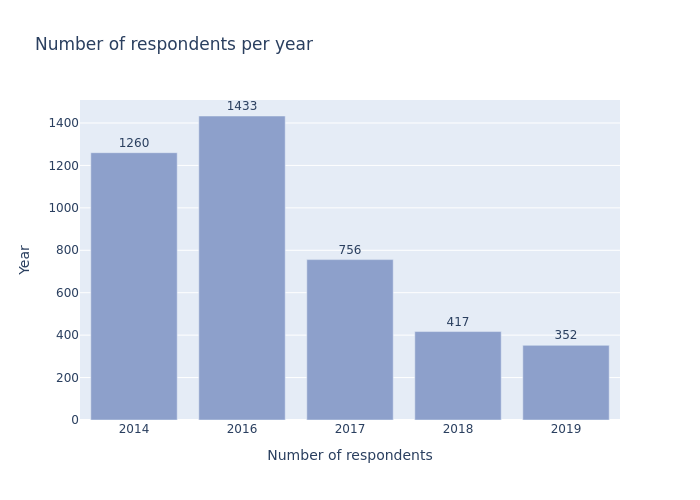

In [5]:
# Hoy many persons answered per year

answer_by_year = answer.groupby(answer['SurveyID'])['UserID'].nunique().to_frame().reset_index()
fig = go.Figure()

fig.add_trace(go.Bar(
    x = answer_by_year['SurveyID'],
    y = answer_by_year['UserID'],
    name = 'Number of respondents per year',
    marker_color = '#8da0cb',
    text = answer_by_year['UserID'],
    textposition= 'outside'
))

fig.update_xaxes(type = 'category',
                 title = 'year')

fig.update_layout(
    title = 'Number of respondents per year',
    xaxis_title = 'Number of respondents',
    yaxis_title = 'Year',
    
)

fig.show()

## where are the respondents from, and where do they work?

To better undertand  the geographical distribution of the participants, we created two chronopleth maps:
1. **Country of Origin** (`questionid == 3`)
2. **Country of employment** (`questionid == 50`)

We applied a log transformation using `np.log10(count + 1)` for the color scale in order to:

* **Avoid dominance by a few countries** with high responses rates.
* **Preserve interpretability** by displaying the actual count of the colorbar.

**Is there a region overrepresented in the dataset that might bias the conclusions?**

Yes. The dataset is heavily skewed towards respondents who are **From or working in the United States**. Additionally, countries such as **United Kingdom, Germany, Australia, India and Canada** form a secondary concentration of responses.

This imbalance may introduce **geographical bias**, as work culture and mental health practices can vary significantly by region. For instance, **North American countries often hace distinct approaches** to workplace mental health compared to other parts of the world



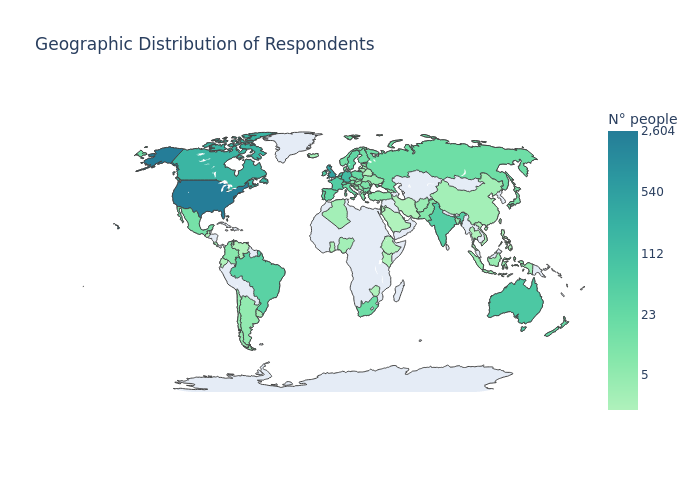

In [6]:
# where are the people from and where do they work?

w_from =q_a.query("questionid==3")['AnswerText'].value_counts()\
        .rename_axis('AnswerText').reset_index(name='count')

w_from['count_log10'] = np.log10(w_from['count'] + 1)

fig = px.choropleth(
    w_from,
    locations='AnswerText',
    locationmode='country names',
    color='count_log10',                 
    hover_name='AnswerText',
    hover_data={'count': True, 'count_log10':False},          
    color_continuous_scale=px.colors.sequential.Tealgrn,
    title='Geographic Distribution of Respondents',
)

max_count =w_from['count'].max()
candidate_ticks = np.geomspace(1, max_count, num=6)
ticks = sorted({int(round(t)) for t in candidate_ticks})

tick_vals = np.log10(ticks)
tick_text = [f'{t:,}' for t in ticks]


fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    coloraxis_colorbar=dict(
        title='N° people',
        tickmode = 'array',
        tickvals = tick_vals,
        ticktext = tick_text
    )
)

fig.show()


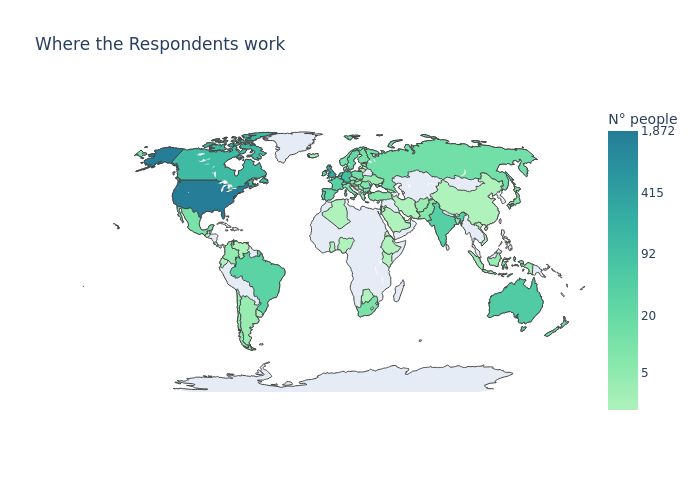

In [7]:

w_work = q_a.query("questionid==50")['AnswerText'].value_counts()\
        .rename_axis('AnswerText').reset_index(name='count')
w_work['count_log10'] = np.log10(w_work['count'] + 1 )

fig = px.choropleth(
    w_work,
    locations='AnswerText',
    locationmode='country names',
    color= 'count_log10',
    hover_name='AnswerText',
    hover_data={'count': True, 'count_log10':False},          
    color_continuous_scale=px.colors.sequential.Tealgrn,
    title='Where the Respondents work'
)

max_count = w_work['count'].max()
candidate_ticks = np.geomspace(1, max_count, num=6)


ticks = sorted({int(round(t)) for t in candidate_ticks})
tick_vals = np.log10(ticks)
tick_text = [f'{t:,}' for t in ticks]

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    coloraxis_colorbar=dict(
        title='N° people',
        tickmode = 'array',
        tickvals = tick_vals,
        ticktext = tick_text
    )
)

fig.show()

## Employees vs self-employed


Understanding respondents' **employment status** is crucial for interpreting job-related mental-health pattern- To gauge stability, we compared the share of participants who reported being **employees** versus **self-employed**

Responses were grouped by year displayed in a **grouped bar chart**

**Key insighs**

* **Employees dominate the sample:** the bast majority of respondents work for an employer, while only a small minority are self-employed.
* **Trend over the time:** participation rise modestly from **2014 to 2016**, then declines steadily from **2016 throught 2019**


In [8]:


employed_df = q_a.query("questionid == 5")
employed_per_Year = employed_df.groupby(['SurveyID', 'AnswerText'])['UserID'].nunique().reset_index()

 

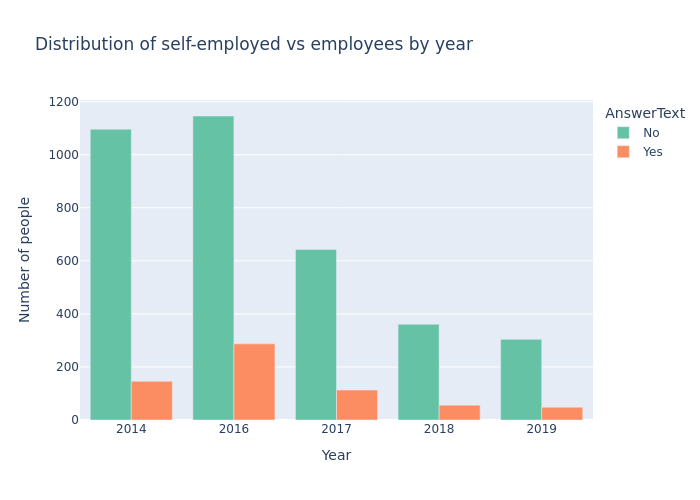

In [9]:
fig = px.bar(
    employed_per_Year,
    x = 'SurveyID',
    y = 'UserID',
    color= 'AnswerText',
    barmode='group',
    title= 'Distribution of self-employed vs employees by year',
    labels= {'SurveyID' : 'Year',
             'UserID' : 'Number of people'},
    color_discrete_sequence= px.colors.qualitative.Set2,
    

)

fig.update_xaxes(
    type = 'category'
)

fig.show()

## Reporting Mental illnes?

We analyzed `questionid == 33`("Do you have a mental health condition?).

**Visualizations Used**
1. **Bar chart** showing raw counts (`Yes`/`No`/`Maybe`) across all years.
2. **Pie Chars** for each year from **2016 to 2019**, displaying proportions in percentages

**Was there an increase in people reporting a mental health condition?**

The **Bar chart** reveals a notable pattern:

* Across all years, the number of respondents aswering **"Yes"** consistenly exceeded those answering **"No"** or **"Maybe"**

The **"Maybe"** category is particularly revealing - it reflects a significant issue:

* Many individuals **are uncertain abaout their mentla health status**, posibly due to a lack of awareness, access to evaluation, or understaning of symptoms. This underscores the need for **Proactive mental health assessments** and suport from employers.

Given the unequal number of responser per year, the **pue chart** offer a clearer comparison of trends. 

* They show a **slight increase** in reported mental health conditions from **2016 to 2018**, with a **drop in 2019**. However, it's important to note that the share of **"Maybe"** responses **steadily increases each year**, suggesting a growing uncertainty or lack  of diagnosis over the time.



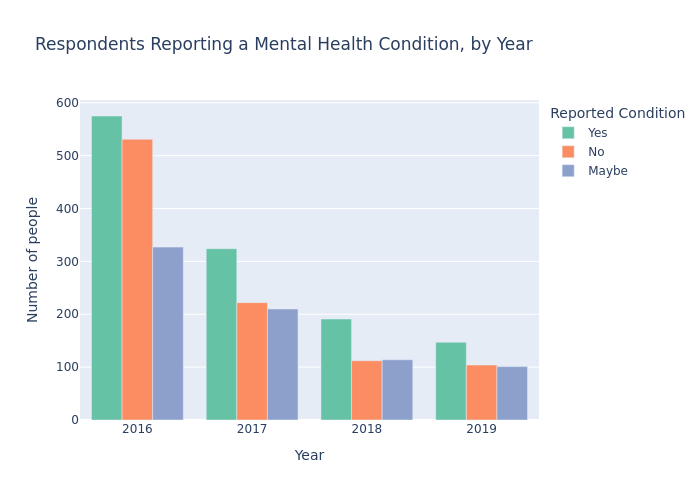

In [10]:
current_health = q_a.query("questionid == 33")
health_per_year = current_health.groupby(['SurveyID', 'AnswerText'])['UserID'].nunique().to_frame().reset_index()





fig = px.bar(health_per_year,
             x = 'SurveyID',
             y= 'UserID',
             title= 'Respondents Reporting a Mental Health Condition, by Year',
             color= 'AnswerText',
             
             color_discrete_sequence= px.colors.qualitative.Set2,
             barmode= 'group',
             labels= {'SurveyID': 'Year',
                      'UserID' : 'Number of people',
                      'AnswerText' : 'Reported Condition'},
            category_orders={'AnswerText': ['Yes', 'No']}


)

fig.show()

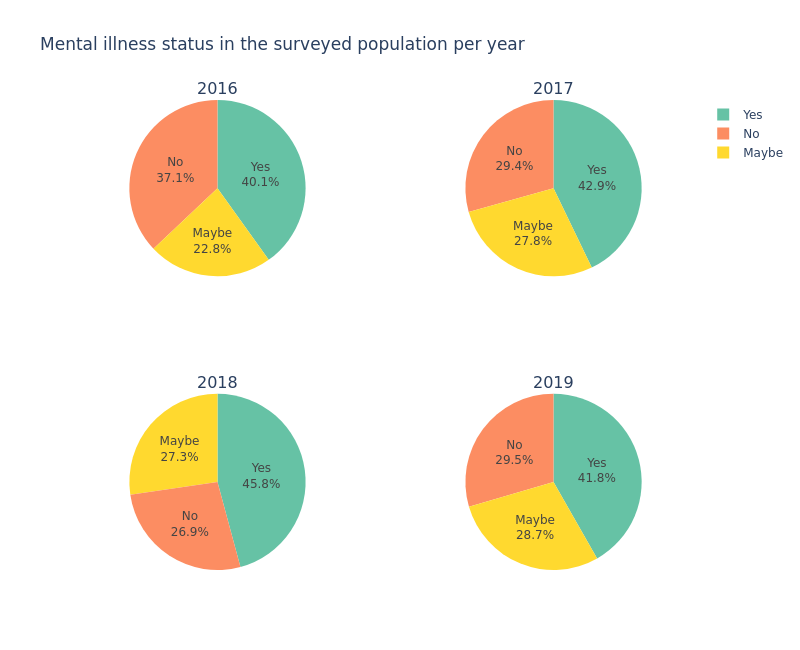

In [11]:
total_per_year = health_per_year.groupby('SurveyID')['UserID'].transform('sum')
health_per_year['Percentage'] = ((health_per_year['UserID'] / total_per_year) * 100).round(3)

color_map = {
    'Yes':   '#66c2a5',   
    'No':    '#fc8d62',   
    'Maybe': '#ffd92f'    
}
fig = make_subplots(rows= 2, cols= 2, subplot_titles= ("2016", "2017", "2018", "2019"),
                    specs= [[{'type':'pie'}, {'type':'pie'}],
                            [{'type':'pie'}, {'type':'pie'}]],      
                    ) 

fig.add_trace(go.Pie(
    labels= health_per_year.query("SurveyID == 2016")['AnswerText'].values,
    values= health_per_year.query("SurveyID == 2016")['Percentage'].values,
    name = '2016',
    textposition='inside',
    textinfo='label+percent',
    hoverinfo='label+percent',
    marker= dict(colors =[color_map[l] for l in  health_per_year.query("SurveyID == 2016")['AnswerText'].values])
), row= 1, col=1)

fig.add_trace(go.Pie(
    labels=health_per_year.query("SurveyID == 2017")['AnswerText'].values,
    values=health_per_year.query("SurveyID == 2017")['Percentage'].values,
    name ='2017',
    textposition= 'inside',
    textinfo='label+percent',
    hoverinfo='label+percent',
    marker= dict(colors =[color_map[l] for l in  health_per_year.query("SurveyID == 2017")['AnswerText'].values])
), row= 1, col=2)

fig.add_trace(go.Pie(
    labels = health_per_year.query("SurveyID == 2018")['AnswerText'].values,
    values = health_per_year.query("SurveyID == 2018")['Percentage'].values,
    name = '2018',
    textposition='inside',
    textinfo='label+percent',
    hoverinfo='label+percent',
    marker= dict(colors =[color_map[l] for l in  health_per_year.query("SurveyID == 2018")['AnswerText'].values])
), row=2, col=1)

fig.add_trace(go.Pie(
    labels=health_per_year.query("SurveyID==2019")['AnswerText'].values,
    values= health_per_year.query("SurveyID == 2019")['Percentage'].values,
    name='2019',
    textposition='inside',
    textinfo='label+percent',
    hoverinfo='label+percent',
    marker= dict(colors =[color_map[l] for l in  health_per_year.query("SurveyID == 2019")['AnswerText'].values])
), row = 2, col = 2)


fig.update_layout(
    title = 'Mental illness status in the surveyed population per year',
    width=800, height=650
)
fig.show()

## Have you ever talked with your employeer about Mental Heath?

We analized responses to `questionid == 58` (Have you discussed your mental health with your employer?)

To ensure consistency, we used the same approach as in the previous section, combining a **bar chart**(raw counts) with **pie charts**(percentages). Note that this question is only available for **three years**, which limits the temporal comparison

**Key insights**

* The **majority of respondents** reported **never having discusses** their mental health with their employer.
* However, the **Pie Charts** reveal a **gradual increase** in the proportion of individuals who have had these conversations

This trend suggests a **positive cultural shift** over time, employees seem to fell **more comfortable discussing mental health issues** at work, reflecting increased awareness and openness within the tech industry. 





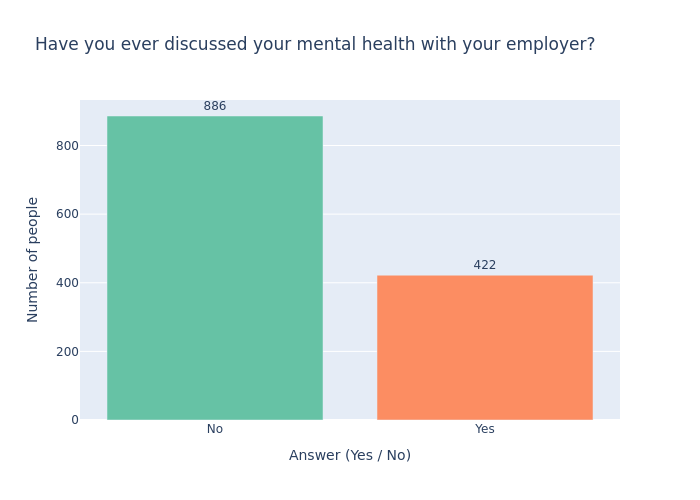

In [12]:


employers_discusse = q_a.query("questionid == 58")['AnswerText']\
    .value_counts().rename_axis('AnswerText').reset_index(name='count')

fig = px.bar(
    employers_discusse,
    x = 'AnswerText',
    y='count',
    title='Have you ever discussed your mental health with your employer?',
    text='count',
    labels={
        'AnswerText': 'Answer (Yes / No)',   
        'count':    'Number of people'     
    },
    color_discrete_sequence=px.colors.qualitative.Set2,
    color='AnswerText'
    

)

fig.update_traces(
    textposition='outside'
)


fig.update_layout(
    showlegend = False

)

fig.show()



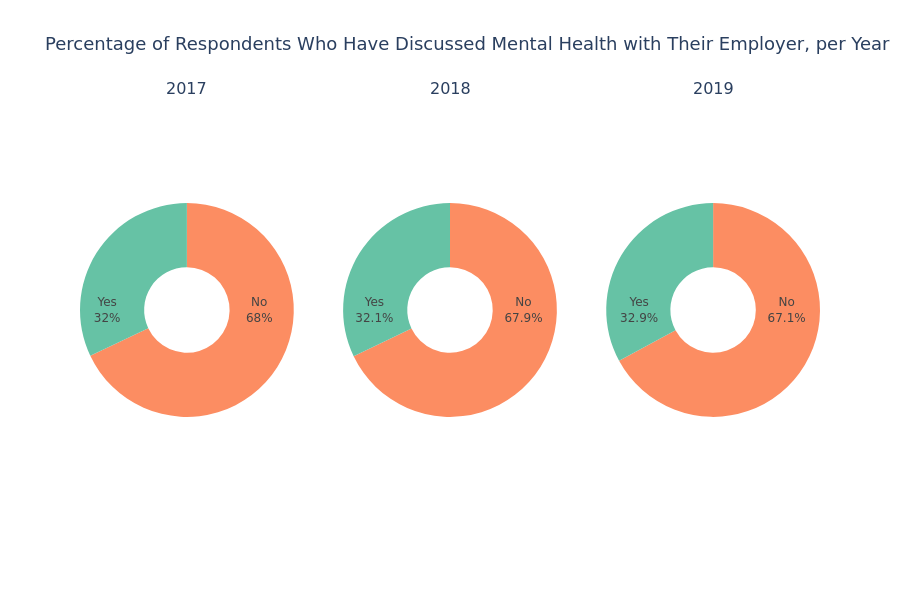

In [13]:
employer_talk = q_a.query("questionid == 58").groupby('SurveyID')['AnswerText']\
            .value_counts().to_frame().reset_index()

employer_talk['total_year'] =employer_talk.groupby('SurveyID')['count'].transform('sum')

employer_talk['pct'] = ((employer_talk['count'] / employer_talk['total_year']) * 100).round(2)

color_map = {
    'Yes':   '#66c2a5',   
    'No':    '#fc8d62',  
}

fig = make_subplots(rows= 1, cols= 3, subplot_titles= ("2017", "2018", "2019"),
                    specs= [[{'type':'pie'}, {'type':'pie'},  {'type':'pie'}]],                                 
                    ) 
    


for i, year in enumerate([2017, 2018, 2019], start=1):
    year_data = employer_talk.query(f"SurveyID == {year}")
    labels = year_data['AnswerText'].values
    values = year_data['pct'].values
    colors = [color_map.get(label, '#999999') for label in labels]  

    fig.add_trace(go.Pie(
        labels=labels,
        values=values,
        name=str(year),
        textinfo='percent+label',
        hoverinfo='label+percent',
        marker=dict(colors=colors),
        insidetextorientation='radial',
        hole=0.4  
    ), row=1, col=i)

fig.update_layout(
    title_text="Percentage of Respondents Who Have Discussed Mental Health with Their Employer, per Year",
    width=900,
    height=600,
    showlegend=False,
    title_font_size=18
)

fig.show()

## Conclusions and Next Steps 
* **Key Findings**  
  - Positive temporal trends in both **mental health prevalence** and **openness to dialogue** in the workplace.  
  
* **Limitations**  
  - **Voluntary sampling** may introduce selection bias. 
  - **Self-reported data**, not based on clinical diagnoses. 
  - **Geographical imbalance**, with a heavy bias toward North American respondents.
* **Recommendations**  
  - Implement clear **mental health policies** and establish formal communication channels between employees and employers.
  - Develop **targeted support programs** for at-risk groups identified in the data.
  - Conduct future surveys with **broader geographic coverage** and include questions related to **burnout and productivity**. 
* **Future Work**  
  - Build a **predictive model** to estimate the likelihood of seeking treatment based on demographic and professional profiles. 
  - Integrate mental health data with **work performance or absenteeism metrics** for deeper insights.
